# Introduction to Regression

## Boston housing data

In [15]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
X,y = load_boston(return_X_y=True)
print(X.shape)
print(y.shape)

(506, 13)
(506,)


## Predicting house value from a single feature

In [17]:
X_rooms = X[:,5].reshape(-1,1) # X[:,5] average number of rooms
X_rooms.shape

(506, 1)

## Plotting house value vs. number of rooms

Text(0, 0.5, 'value of houses')

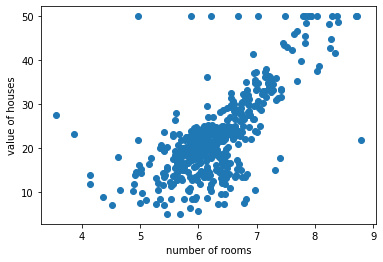

In [19]:
plt.scatter(X_rooms,y)
plt.xlabel('number of rooms')
plt.ylabel('value of houses')

## Predicting house value from a single feature

In [21]:
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

## Plotting house value vs. number of rooms

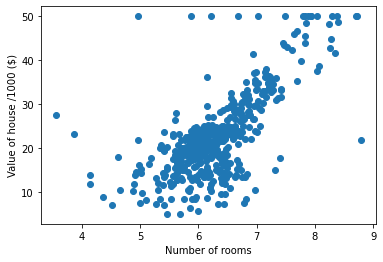

In [23]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

## Fitting a regression model

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_rooms, y)
prediction_space = np.linspace(min(X_rooms), min(X_rooms)).reshape(-1, 1)

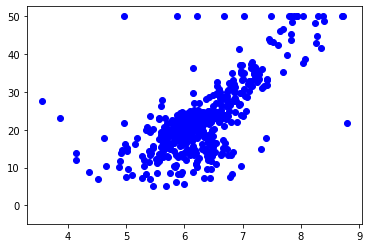

In [26]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),
        color='black', linewidth=3)
plt.show()

# The basic of linear regression

## Regression mechanics

### Linear regression on all features

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.7112260057484912

# Cross validation

In [33]:
##Cross-validation in scikit-learn
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


In [35]:
np.mean(cv_results)

0.3532759243958778

# Regularized regression

## Ridge regression in scilit-learn

In [40]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.6996938275127317

## Lasso regression in scikit-learn

In [43]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.5950229535328551

## Lasso for feature selection in scikit-learn

In [52]:
from sklearn.linear_model import Lasso
from sklearn import datasets
boston=datasets.load_boston()
names = boston.drop('MEDV', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

AttributeError: drop